# Предобработка датасетов для дальнейшей визуализации и агрегации
## Исследование данных

## Датасет 1. Наличие неровностей дорог

In [63]:
import pandas as pd

nerovnosti = pd.read_csv("/Users/maaltysheva/Downloads/неровности_дороги.csv", sep=';')

# удаляю первую строку
nerovnosti = nerovnosti[1:]

In [64]:
nerovnosti.head(2)

,ID,Name,global_id,AdmArea,District,Location,Longitude_WGS84,Latitude_WGS84,Material,geoData,geodata_center,Unnamed: 11
1,1133,Искусственная дорожная неровность по адресу Бо...,1711216,Южный административный округ,район Орехово-Борисово Северное,"Борисовский проезд, дом 20",37.7264106642299,55.6256708883571,пластик,"{coordinates=[37.726410664, 55.625670888], typ...",NaN,NaN
2,1009,Искусственная дорожная неровность по адресу Ор...,1711244,Южный административный округ,район Зябликово,"Ореховый проезд, дом 43А",37.7294605021117,55.6149675365588,пластик,"{coordinates=[37.729460502, 55.614967537], typ...",NaN,NaN


In [65]:
# оставлю только нужыне столбцы
nerovnosti = nerovnosti[['Name', 'global_id', 'AdmArea', 'District', 'Location', 'Longitude_WGS84', 'Latitude_WGS84', 'Material']]

In [66]:
set(nerovnosti['Material'])

{'асфальт', 'пластик'}

In [67]:
nerovnosti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 1 to 581
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             581 non-null    object
 1   global_id        581 non-null    object
 2   AdmArea          581 non-null    object
 3   District         581 non-null    object
 4   Location         581 non-null    object
 5   Longitude_WGS84  581 non-null    object
 6   Latitude_WGS84   581 non-null    object
 7   Material         581 non-null    object
dtypes: object(8)
memory usage: 36.4+ KB


In [68]:
# global_id приведу к int
# Longitude_WGS84 и Latitude_WGS84 к float
# переименую Longitude_WGS84 и Latitude_WGS84 в lon и lat
nerovnosti['global_id'] = nerovnosti['global_id'].astype(int)
nerovnosti= nerovnosti.rename(columns = {'Longitude_WGS84': 'lon', 'Latitude_WGS84': 'lat'})
nerovnosti['lon'] = nerovnosti['lon'].astype(float)
nerovnosti['lat'] = nerovnosti['lat'].astype(float)
print('Датасет 1 - Неровности дорог - обработан и готов к выгрузке')

Датасет 1 - Неровности дорог - обработан и готов к выгрузке


In [69]:
nerovnosti.to_csv('nerovnosti.csv', index=False)

## Датасет 2. Наличие сложных дорожных узлов

In [48]:
difficult_node = nerovnosti = pd.read_csv("/Users/maaltysheva/Downloads/сложные_дорожные_узлы.csv", sep=';')

# удаляю первую строку
difficult_node = difficult_node[1:]

In [53]:
difficult_node.head(2)

,TPUName,AdmArea,District,NearStation,Holder,AvailableTransfer,global_id,geoData,geodata_center,Unnamed: 9,lon,lat
1,ТПУ Алтуфьево АвД СВАО,Северо-Восточный административный округ,район Лианозово,станция метро «Алтуфьево»,ГБУ «Автомобильные дороги СВАО»,метро; перехватывающая парковка,638887232,"{coordinates=[37.586506023, 55.898963418], typ...",NaN,NaN,37.586506,55.898963
2,ТПУ Белорусская АвД города Москвы,Центральный административный округ,Тверской район,Белорусский вокзал,ГБУ «Автомобильные дороги»,Станция железной дороги; перехватывающая парко...,638887236,"{coordinates=[37.582353964, 55.77727374], type...",NaN,NaN,37.582354,55.777274


In [50]:
difficult_node['geoData'][1]

'{coordinates=[37.586506023, 55.898963418], type=Point}'

In [52]:
import pandas as pd
import re
import numpy as np

def parse_geo(geo_str):
    if pd.isna(geo_str) or not isinstance(geo_str, str):
        return pd.Series([np.nan, np.nan], index=['lon', 'lat'])
    # Ищем координаты в формате [lon, lat]
    match = re.search(r'coordinates=\[([-\d.]+),\s*([-\d.]+)\]', str(geo_str))
    if match:
        lon = float(match.group(1))
        lat = float(match.group(2))
        return pd.Series([lon, lat], index=['lon', 'lat'])
    return pd.Series([np.nan, np.nan], index=['lon', 'lat'])

# Применяем к вашему датафрейму df
difficult_node[['lon', 'lat']] = difficult_node['geoData'].apply(parse_geo)

/var/folders/zr/dy909k4x4mq8gfl0xxtpmr5xz1qs41/T/ipykernel_89559/819493473.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficult_node[['lon', 'lat']] = difficult_node['geoData'].apply(parse_geo)
/var/folders/zr/dy909k4x4mq8gfl0xxtpmr5xz1qs41/T/ipykernel_89559/819493473.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difficult_node[['lon', 'lat']] = difficult_node['geoData'].apply(parse_geo)


In [54]:
# оставлю только нужыне столбцы
difficult_node = difficult_node[['TPUName', 'AdmArea', 'District', 'NearStation', 'Holder', 'global_id', 'lon', 'lat']]

In [59]:
difficult_node.head(3)

,TPUName,AdmArea,District,NearStation,Holder,global_id,lon,lat
1,ТПУ Алтуфьево АвД СВАО,Северо-Восточный административный округ,район Лианозово,станция метро «Алтуфьево»,ГБУ «Автомобильные дороги СВАО»,638887232,37.586506,55.898963
2,ТПУ Белорусская АвД города Москвы,Центральный административный округ,Тверской район,Белорусский вокзал,ГБУ «Автомобильные дороги»,638887236,37.582354,55.777274
3,ТПУ Белорусская АвД ЦАО,Центральный административный округ,Тверской район,Белорусский вокзал,ГБУ «Автомобильные дороги ЦАО»,638887249,37.582611,55.775175


In [56]:
difficult_node.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 1 to 110
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TPUName      110 non-null    object 
 1   AdmArea      110 non-null    object 
 2   District     110 non-null    object 
 3   NearStation  110 non-null    object 
 4   Holder       110 non-null    object 
 5   global_id    110 non-null    object 
 6   lon          110 non-null    float64
 7   lat          110 non-null    float64
dtypes: float64(2), object(6)
memory usage: 7.0+ KB


In [57]:
difficult_node['global_id'] = difficult_node['global_id'].astype(int)

In [150]:
difficult_node = difficult_node.rename(columns = {'TPUName': 'Name'})

In [60]:
difficult_node.to_csv('difficult_node.csv', index=False)

## Датасет 3. Парковки

In [75]:
plat_park = pd.read_csv("/Users/maaltysheva/Downloads/платные_парковки.csv", sep=';')

# удаляю первую строку
plat_park = plat_park[1:]

plat_park_2 = pd.read_csv("/Users/maaltysheva/Downloads/платные_парковки_2.csv", sep=';')

# удаляю первую строку
plat_park_2 = plat_park_2[1:]

perehvat_park = pd.read_csv("/Users/maaltysheva/Downloads/перехват_парковки.csv", sep=';')

# удаляю первую строку
perehvat_park = perehvat_park[1:]

taxi_park = pd.read_csv("/Users/maaltysheva/Downloads/парковки_такси.csv", sep=';')

# удаляю первую строку
taxi_park = taxi_park[1:]

In [77]:
plat_park.head(2)

,ID,Name,PlaceID,AdmArea,District,Address,Hours,Tariffs,CountSpaces,global_id,geoData,geodata_center,Unnamed: 12
1,225,Парковка № 9401,9401,Северный административный округ,Тимирязевский район,"Красностуденческий проезд, дом 5",круглосуточно,nested data,51,2373064929,"{coordinates=[[[37.56734, 55.82535], [37.56723...",NaN,NaN
2,226,Парковка № 9402,9402,Северный административный округ,Хорошёвский район,"Хорошёвское шоссе, владение 52, строение Б/Н",круглосуточно,nested data,25,2373065870,"{coordinates=[[[37.534988, 55.777171], [37.534...",NaN,NaN


In [86]:
set(plat_park['Hours'])

{'круглосуточно'}

In [81]:
plat_park['geoData'][1]

'{coordinates=[[[37.56734, 55.82535], [37.567238, 55.825548], [37.568188, 55.825725], [37.568304, 55.825529], [37.56734, 55.82535]]], type=Polygon}'

In [78]:
plat_park_2.head(2)

,ID,ParkingName,ParkingZoneNumber,AdmArea,District,Address,CarCapacity,CarCapacityDisabled,Tariffs,global_id,geoData,geodata_center,Unnamed: 12
1,59895,Парковка №4046 (157),4046,Восточный административный округ,район Новогиреево,"Напольный проезд, дом 10",12,0,nested data,2755298624,"{coordinates=[[[37.825735, 55.757824], [37.826...","{coordinates=[37.826719, 55.757689], type=Point}",NaN
2,60104,Парковка №4034 (45),4034,Юго-Западный административный округ,Академический район,"улица Грузинский Вал, дом 14",18,2,nested data,2755298661,"{coordinates=[[[37.590939541, 55.695437261], [...","{coordinates=[37.591567899, 55.695269112], typ...",NaN


In [90]:
plat_park_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16072 entries, 1 to 16072
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16072 non-null  object 
 1   ParkingName          16072 non-null  object 
 2   ParkingZoneNumber    16072 non-null  object 
 3   AdmArea              16072 non-null  object 
 4   District             16072 non-null  object 
 5   Address              16072 non-null  object 
 6   CarCapacity          16072 non-null  object 
 7   CarCapacityDisabled  16072 non-null  object 
 8   Tariffs              16072 non-null  object 
 9   global_id            16072 non-null  object 
 10  geoData              16072 non-null  object 
 11  geodata_center       16072 non-null  object 
 12  Unnamed: 12          0 non-null      float64
dtypes: float64(1), object(12)
memory usage: 1.6+ MB


In [87]:
set(plat_park_2['Tariffs'])

{'nested data'}

In [82]:
plat_park_2['geoData'][1]

'{coordinates=[[[37.825735, 55.757824], [37.826719, 55.757689]]], type=MultiLineString}'

In [79]:
perehvat_park.head(2)

,ParkingName,MetroStation,MetroLine,DiameterStation,DiameterName,AdmArea,District,LocationDescription,Schedule,OrgPhone,CarCapacity,global_id,geoData,geodata_center,Unnamed: 14
1,Перехватывающая парковка метрополитена «Красно...,Красногвардейская,Замоскворецкая линия,NaN,NaN,Южный административный округ,район Зябликово,NaN,круглосуточно,NaN,528,1044474873,"{coordinates=[37.7392635, 55.613419], type=Point}",NaN,NaN
2,Перехватывающая парковка №9089 метрополитена 5...,Царицыно,Замоскворецкая линия,NaN,NaN,Южный административный округ,район Царицыно,Каспийская улица,круглосуточно,NaN,261,1044474885,"{coordinates=[37.6687295, 55.619927], type=Point}",NaN,NaN


In [91]:
perehvat_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 1 to 103
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ParkingName          103 non-null    object 
 1   MetroStation         100 non-null    object 
 2   MetroLine            100 non-null    object 
 3   DiameterStation      3 non-null      object 
 4   DiameterName         3 non-null      object 
 5   AdmArea              103 non-null    object 
 6   District             103 non-null    object 
 7   LocationDescription  28 non-null     object 
 8   Schedule             103 non-null    object 
 9   OrgPhone             0 non-null      object 
 10  CarCapacity          103 non-null    object 
 11  global_id            103 non-null    object 
 12  geoData              103 non-null    object 
 13  geodata_center       0 non-null      object 
 14  Unnamed: 14          0 non-null      float64
dtypes: float64(1), object(14)
memory usage: 

In [88]:
set(perehvat_park['Schedule'])

{'круглосуточно'}

In [83]:
perehvat_park['geoData'][1]

'{coordinates=[37.7392635, 55.613419], type=Point}'

In [80]:
taxi_park.head(2)

,ID,Name,global_id,AdmArea,District,Address,LocationDescription,Longitude_WGS84,Latitude_WGS84,CarCapacity,Mode,geoData,geodata_center,Unnamed: 13
1,25635,Стоянка легкового такси по адресу проспект Буд...,1045123857,Восточный административный округ,район Соколиная Гора,"город Москва, проспект Буденного, дом 39, корп...",Возможны ограничения в парковании транспортных...,37.733925641305916,55.76407707249814,3,круглосуточно,"{coordinates=[37.733925641, 55.764077072], typ...",NaN,NaN
2,25682,Парковка такси по адресу Госпитальная улица до...,1045388721,Центральный административный округ,Басманный район,"город Москва, Госпитальная улица, дом 14/1",NaN,37.696289,55.767273,4,круглосуточно,"{coordinates=[37.696289, 55.767273], type=Point}",NaN,NaN


In [89]:
set(taxi_park['Mode'])

{'круглосуточно'}

In [84]:
taxi_park['geoData'][1]

'{coordinates=[37.733925641, 55.764077072], type=Point}'

### выделяю столбцы, которые есть везде
- Name или ParkingName - необходимо переименоват и привести к единому образу
- PlaceID или ParkingZoneNumber или ID (отсутствует у perehvat_park - заменим на 0)
- global_id
- AdmArea
- District
- Address (отсутствует у перехватывающих, заменить на станцию метро, так как парковка у метро - MetroStation)
- все парковки имеют статус - круглосуточно
- geodata_center geoData в plat_park взять первую точку из geoData все разбить на долготу и широту
- CountSpaces CarCapacity
- добавить столбец с описанием типа парковки "платная парковка"/"перехватывающая парковка"/"парквока такси"

In [ ]:
# Разбираю каждый отдельный датасет и привожу к необходимому виду

In [93]:
import pandas as pd
import re

def extract_first_point(geo_str):
    if pd.isna(geo_str):
        return pd.NA, pd.NA
    # Ищем [[[coords]]] внутри coordinates=
    match = re.search(r'coordinates=\[\[\[(.*?)\]\]\]', str(geo_str))
    if not match:
        return pd.NA, pd.NA
    coords_str = match.group(1)
    # Разделяем на точки [lon, lat]
    points = re.split(r'\],\s*\[', coords_str)
    if points:
        first_point = points[0].strip('[] ')
        lon_lat = re.split(r',\s*', first_point)
        if len(lon_lat) == 2:
            try:
                return float(lon_lat[0]), float(lon_lat[1])  # lon первый
            except ValueError:
                pass
    return pd.NA, pd.NA

# Применяем к вашему датафрейму data_1
plat_park[['lon', 'lat']] = plat_park['geoData'].apply(lambda x: pd.Series(extract_first_point(x)))

In [94]:
plat_park.head(2)

,ID,Name,PlaceID,AdmArea,District,Address,Hours,Tariffs,CountSpaces,global_id,geoData,geodata_center,Unnamed: 12,lon,lat
1,225,Парковка № 9401,9401,Северный административный округ,Тимирязевский район,"Красностуденческий проезд, дом 5",круглосуточно,nested data,51,2373064929,"{coordinates=[[[37.56734, 55.82535], [37.56723...",NaN,NaN,37.567340,55.825350
2,226,Парковка № 9402,9402,Северный административный округ,Хорошёвский район,"Хорошёвское шоссе, владение 52, строение Б/Н",круглосуточно,nested data,25,2373065870,"{coordinates=[[[37.534988, 55.777171], [37.534...",NaN,NaN,37.534988,55.777171


In [95]:
plat_park = plat_park[['ID', 'Name', 'PlaceID', 'AdmArea', 'District', 'Address', 'CountSpaces', 'global_id', 'lon', 'lat']]

In [130]:
plat_park['type_park'] = ['Платная парковка' for i in range(len(plat_park))]

In [131]:
plat_park.head(2)

,ID,Name,PlaceID,AdmArea,District,Address,CountSpaces,global_id,lon,lat,type_park
1,225,Парковка № 9401,9401,Северный административный округ,Тимирязевский район,"Красностуденческий проезд, дом 5",51,2373064929,37.567340,55.825350,Платная парковка
2,226,Парковка № 9402,9402,Северный административный округ,Хорошёвский район,"Хорошёвское шоссе, владение 52, строение Б/Н",25,2373065870,37.534988,55.777171,Платная парковка


In [97]:
print("plat_park - готово")

plat_park - готово


In [132]:
plat_park_2.head(1)

,ID,Name,PlaceID,AdmArea,District,Address,CountSpaces,global_id,lon,lat,type_park
1,59895,Парковка №4046 (157),4046,Восточный административный округ,район Новогиреево,"Напольный проезд, дом 10",12,2755298624,37.826719,55.757689,Платная парковка


In [100]:
plat_park_2[['lon', 'lat']] = plat_park_2['geodata_center'].apply(parse_geo)

In [102]:
plat_park_2 = plat_park_2.rename(columns = {'ParkingName': 'Name', 
                                           'ParkingZoneNumber': 'PlaceID',
                                           'CarCapacity': 'CountSpaces'})

In [103]:
plat_park_2 = plat_park_2[['ID', 'Name', 'PlaceID', 'AdmArea', 'District', 'Address', 'CountSpaces', 'global_id', 'lon', 'lat']]

In [129]:
plat_park_2['type_park'] = ['Платная парковка' for i in range(len(plat_park_2))]

In [133]:
perehvat_park.head(2)

,ID,Name,PlaceID,AdmArea,District,Address,CountSpaces,global_id,lon,lat,type_park
1,0,Перехватывающая парковка метрополитена «Красно...,0,Южный административный округ,район Зябликово,Красногвардейская,528,1044474873,37.739263,55.613419,Перехватывающая парковка
2,0,Перехватывающая парковка №9089 метрополитена 5...,0,Южный административный округ,район Царицыно,Царицыно,261,1044474885,37.668729,55.619927,Перехватывающая парковка


In [117]:
perehvat_park['ID'] = [0 for i in range(len(perehvat_park))]
perehvat_park['PlaceID'] = [0 for i in range(len(perehvat_park))]

In [118]:
perehvat_park[['lon', 'lat']] = perehvat_park['geoData'].apply(parse_geo)

In [120]:
perehvat_park = perehvat_park.rename(columns = {'ParkingName': 'Name', 
                                           'ParkingZoneNumber': 'PlaceID',
                                                'MetroStation': 'Address',
                                           'CarCapacity': 'CountSpaces'})

In [121]:
perehvat_park = perehvat_park[['ID', 'Name', 'PlaceID', 'AdmArea', 'District', 'Address', 'CountSpaces', 'global_id', 'lon', 'lat']]

In [128]:
perehvat_park['type_park'] = ['Перехватывающая парковка' for i in range(len(perehvat_park))]

In [140]:
taxi_park.head(2)

,ID,Name,PlaceID,AdmArea,District,Address,CountSpaces,global_id,lon,lat
1,25635,Стоянка легкового такси по адресу проспект Буд...,0,Восточный административный округ,район Соколиная Гора,"город Москва, проспект Буденного, дом 39, корп...",3,1045123857,37.733926,55.764077
2,25682,Парковка такси по адресу Госпитальная улица до...,0,Центральный административный округ,Басманный район,"город Москва, Госпитальная улица, дом 14/1",4,1045388721,37.696289,55.767273


In [135]:
taxi_park['PlaceID'] = [0 for i in range(len(taxi_park))]

In [136]:
taxi_park[['lon', 'lat']] = taxi_park['geoData'].apply(parse_geo)

In [138]:
taxi_park = taxi_park.rename(columns = {'CarCapacity': 'CountSpaces'})

In [139]:
taxi_park = taxi_park[['ID', 'Name', 'PlaceID', 'AdmArea', 'District', 'Address', 'CountSpaces', 'global_id', 'lon', 'lat']]

In [141]:
taxi_park['type_park'] = ['Парковка такси' for i in range(len(taxi_park))]

In [142]:
# Собираем и сохраняем итоговый датасет
parking = pd.concat([plat_park_2, plat_park, perehvat_park, taxi_park])

In [143]:
parking.head(2)

,ID,Name,PlaceID,AdmArea,District,Address,CountSpaces,global_id,lon,lat,type_park
1,59895,Парковка №4046 (157),4046,Восточный административный округ,район Новогиреево,"Напольный проезд, дом 10",12,2755298624,37.826719,55.757689,Платная парковка
2,60104,Парковка №4034 (45),4034,Юго-Западный административный округ,Академический район,"улица Грузинский Вал, дом 14",18,2755298661,37.591568,55.695269,Платная парковка


In [145]:
parking = parking.drop_duplicates()

In [146]:
len(parking)

16605

In [160]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16605 entries, 1 to 371
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           16605 non-null  object 
 1   Name         16605 non-null  object 
 2   PlaceID      16605 non-null  object 
 3   AdmArea      16605 non-null  object 
 4   District     16605 non-null  object 
 5   Address      16602 non-null  object 
 6   CountSpaces  16605 non-null  object 
 7   global_id    16605 non-null  object 
 8   lon          16605 non-null  float64
 9   lat          16605 non-null  float64
 10  type_park    16605 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


In [168]:
parking.to_csv('parking.csv', index=False)

# Датасет 4. Пассажиропоток по месяцам

In [179]:
pass_mes = pd.read_csv("/Users/maaltysheva/Downloads/пассажиропоток_по_мес.csv", sep=';')

# удаляю первую строку
pass_mes = pass_mes[1:]

In [180]:
pass_mes.head(2)

,ID,Year,Month,TransportType,PassengerTraffic,global_id,Unnamed: 6
1,1,2019,Январь,Автобус,93017249,2493438533,NaN
2,2,2019,Январь,Трамвай,16851856,2493438534,NaN


In [181]:
pass_mes = pass_mes[['ID', 'Year', 'Month', 'TransportType', 'PassengerTraffic', 'global_id']]

In [182]:
len(pass_mes)

454

In [183]:
pass_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 1 to 454
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                454 non-null    object
 1   Year              454 non-null    object
 2   Month             454 non-null    object
 3   TransportType     454 non-null    object
 4   PassengerTraffic  454 non-null    object
 5   global_id         454 non-null    object
dtypes: object(6)
memory usage: 21.4+ KB


In [184]:
pass_mes['global_id'] = pass_mes['global_id'].astype(int)

In [185]:
pass_mes['ID'] = pass_mes['ID'].astype(int)
pass_mes['Year'] = pass_mes['Year'].astype(int)
pass_mes['PassengerTraffic'] = pass_mes['PassengerTraffic'].astype(int)

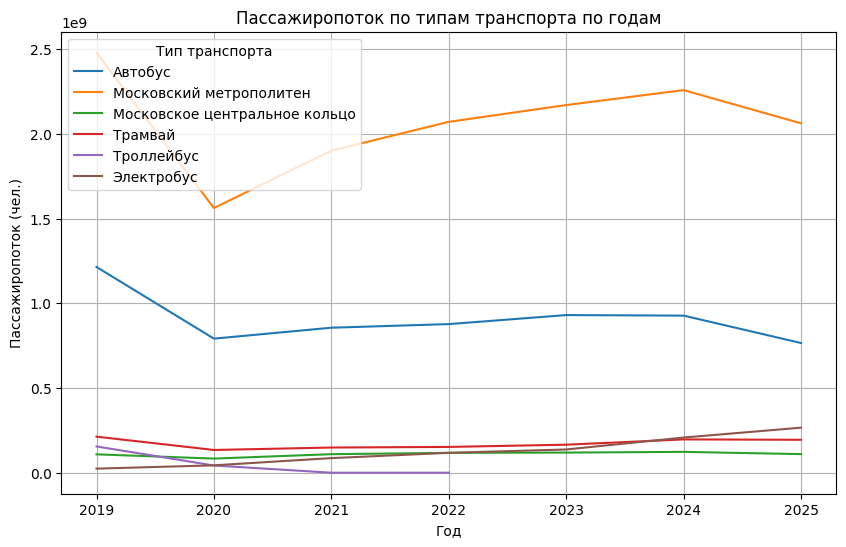

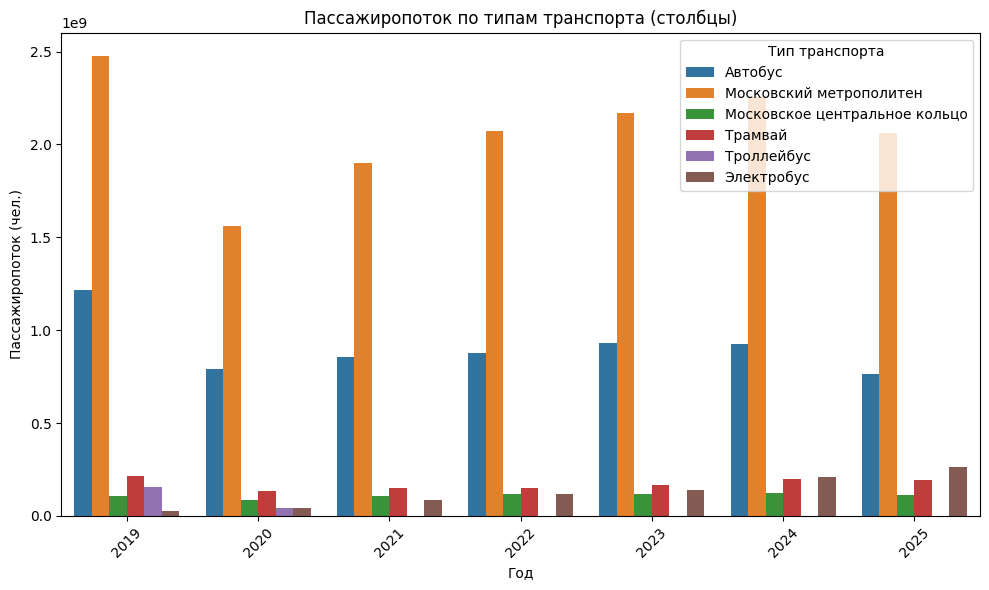

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Агрегируем пассажиропоток по годам и типам транспорта
traffic_summary = pass_mes.groupby(['Year', 'TransportType'])['PassengerTraffic'].sum().reset_index()

# График 1: Линейный по годам
plt.figure(figsize=(10, 6))
sns.lineplot(data=traffic_summary, x='Year', y='PassengerTraffic', hue='TransportType')
plt.title('Пассажиропоток по типам транспорта по годам')
plt.ylabel('Пассажиропоток (чел.)')
plt.xlabel('Год')
plt.legend(title='Тип транспорта')
plt.grid(True)
plt.show()

# График 2: Столбчатый
plt.figure(figsize=(10, 6))
sns.barplot(data=traffic_summary, x='Year', y='PassengerTraffic', hue='TransportType')
plt.title('Пассажиропоток по типам транспорта (столбцы)')
plt.ylabel('Пассажиропоток (чел.)')
plt.xlabel('Год')
plt.legend(title='Тип транспорта')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [219]:
pass_mes.head(20)

,ID,Year,Month,TransportType,PassengerTraffic,global_id,Month_num,Data
1,1,2019,Январь,Автобус,93017249,2493438533,01,2019-01-01
2,2,2019,Январь,Трамвай,16851856,2493438534,01,2019-01-01
3,3,2019,Январь,Троллейбус,13241379,2493438535,01,2019-01-01
4,4,2019,Январь,Электробус,472840,2493438536,01,2019-01-01
5,5,2019,Январь,Московский метрополитен,185698294,2493438537,01,2019-01-01
6,6,2019,Январь,Московское центральное кольцо,7227364,2493438538,01,2019-01-01
7,7,2019,Февраль,Автобус,100185579,2493438539,02,2019-02-01
8,8,2019,Февраль,Трамвай,18239165,2493438540,02,2019-02-01
9,9,2019,Февраль,Троллейбус,14286051,2493438541,02,2019-02-01
10,10,2019,Февраль,Электробус,610208,2493438542,02,2019-02-01


In [202]:
month_map = {'Январь': '01', 'Февраль': '02', 'Март': '03', 'Апрель': '04', 'Май': '05', 'Июнь': '06',
             'Июль':'07', 'Август':'08', 'Сентябрь':'09', 'Октябрь':'10', 'Ноябрь':'11', 'Декабрь':'12'}

pass_mes['Month_num'] = pass_mes['Month'].map(month_map)

In [214]:
pass_mes['Data'] = pass_mes['Month_num'] + '.' + '01' + '.' +  pass_mes['Year'].astype(str)

In [215]:
pass_mes['Data'] = pd.to_datetime(pass_mes['Data'])

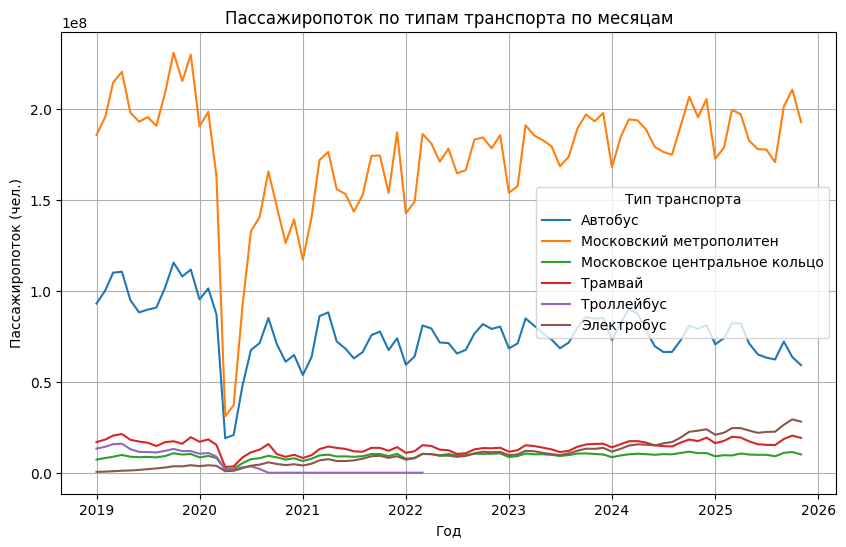

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Агрегируем пассажиропоток по годам и типам транспорта
traffic_summary = pass_mes.groupby(['Data', 'TransportType'])['PassengerTraffic'].sum().reset_index()

# График 1: Линейный по годам
plt.figure(figsize=(10, 6))
sns.lineplot(data=traffic_summary, x='Data', y='PassengerTraffic', hue='TransportType')
plt.title('Пассажиропоток по типам транспорта по месяцам')
plt.ylabel('Пассажиропоток (чел.)')
plt.xlabel('Год')
plt.legend(title='Тип транспорта')
plt.grid(True)
plt.show()

In [220]:
pass_mes.to_csv('pass_mes.csv', index=False)

## Датасет 5. Зарядные заправки для электротранспорта

In [225]:
zariad = pd.read_csv("/Users/maaltysheva/Downloads/заряд_электро.csv", sep=';')

# удаляю первую строку
zariad = zariad[1:]

In [226]:
zariad.head(2)

,Name,BalanceHolder,AdmArea,District,Address,global_id,geoData,geodata_center,Unnamed: 8
1,"Станция №2, 22 кВт",Департамент транспорта и развития дорожно-тран...,Центральный административный округ,район Замоскворечье,"Российская Федерация, город Москва, внутригоро...",2566160457,"{coordinates=[37.63573, 55.73453], type=Point}",NaN,NaN
2,"Станция №71, 22 кВт",Департамент транспорта и развития дорожно-тран...,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",2566160494,"{coordinates=[37.65551, 55.73631], type=Point}",NaN,NaN


In [228]:
# Необходимо оставить нужные поля, вывести координаты, привести айдишники к инту
zariad[['lon', 'lat']] = zariad['geoData'].apply(parse_geo)
zariad = zariad[['global_id', 'Name', 'BalanceHolder', 'AdmArea', 'District', 'Address', 'lon', 'lat']]
zariad['global_id'] = zariad['global_id'].astype(int)

In [229]:
zariad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 1 to 407
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   global_id      407 non-null    int64  
 1   Name           407 non-null    object 
 2   BalanceHolder  407 non-null    object 
 3   AdmArea        407 non-null    object 
 4   District       407 non-null    object 
 5   Address        407 non-null    object 
 6   lon            407 non-null    float64
 7   lat            407 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.6+ KB


In [230]:
zariad.to_csv('zariad.csv', index=False)

## Датасет 6. Заправки

In [237]:
zapravki_1 = pd.read_csv("/Users/maaltysheva/Downloads/заправки_1.csv", sep=';')

# удаляю первую строку
zapravki_1 = zapravki_1[1:]

zapravki_2 = pd.read_csv("/Users/maaltysheva/Downloads/заправки_2.csv", sep=';')

# удаляю первую строку
zapravki_2 = zapravki_2[1:]

In [234]:
zapravki_1.head(2)

,ID,FullName,ShortName,global_id,AdmArea,District,Address,Owner,Violations,TestDate,geoData,geodata_center,Unnamed: 12
1,16,Автомобильная заправочная станция «ДЭКа-ОЙЛ» н...,Автомобильная заправочная станция «ДЭКа-ОЙЛ» н...,25792131,Троицкий административный округ,поселение Вороновское,58-й километр Калужского шоссе,ООО «ДЭКа-ОЙЛ»,nested data,14.05.2015,"{coordinates=[37.172439523, 55.343229037], typ...","{coordinates=[37.172439523, 55.343229037], typ...",NaN
2,17,Автомобильная заправочная станция «НефтеХим На...,АЗС «НефтеХим Нафта» на 41-м километре Калужск...,25797283,Троицкий административный округ,поселение Троицк,41-й километр Калужского шоссе,ООО «НефтеХим Нафта»,nested data,19.05.2015,"{coordinates=[37.299622258, 55.466529149], typ...","{coordinates=[37.299622258, 55.466529149], typ...",NaN


In [238]:
zapravki_2.head(2)

,ID,FullName,global_id,ShortName,AdmArea,District,Address,Owner,TestDate,geoData,geodata_center,Unnamed: 11
1,14,Автомобильный заправочный комплекс № 1 «РН-Мос...,4539435,АЗК № 1 «РН-Москва»,Северо-Восточный административный округ,район Отрадное,"улица Декабристов, дом 47Б",ОАО «РН-Москва»,04.04.2013,"{coordinates=[37.623636836, 55.858348644], typ...",NaN,NaN
2,15,Автомобильный заправочный комплекс № 11 «РН-Мо...,4539436,АЗК № 11 «РН-Москва»,Северный административный округ,Бескудниковский район,"Дубнинская улица, дом 52",ОАО «РН-Москва»,04.04.2013,"{coordinates=[37.553284632, 55.896976741], typ...","{coordinates=[37.553284632, 55.896976741], typ...",NaN


In [239]:
zapravki_1[['lon', 'lat']] = zapravki_1['geoData'].apply(parse_geo)
zapravki_1 = zapravki_1[['ID', 'global_id', 'FullName', 'ShortName', 'AdmArea', 'District', 'Address', 'Owner', 'TestDate', 'lon', 'lat']]
zapravki_1['global_id'] = zapravki_1['global_id'].astype(int)
zapravki_1 = zapravki_1.rename(columns = {'FullName': 'Name'})

zapravki_2[['lon', 'lat']] = zapravki_2['geoData'].apply(parse_geo)
zapravki_2 = zapravki_2[['ID', 'global_id', 'FullName', 'ShortName', 'AdmArea', 'District', 'Address', 'Owner', 'TestDate', 'lon', 'lat']]
zapravki_2['global_id'] = zapravki_2['global_id'].astype(int)
zapravki_2 = zapravki_2.rename(columns = {'FullName': 'Name'})

zapravki = pd.concat([zapravki_1, zapravki_2])

In [240]:
zapravki.head(2)

,ID,global_id,Name,ShortName,AdmArea,District,Address,Owner,TestDate,lon,lat
1,16,25792131,Автомобильная заправочная станция «ДЭКа-ОЙЛ» н...,Автомобильная заправочная станция «ДЭКа-ОЙЛ» н...,Троицкий административный округ,поселение Вороновское,58-й километр Калужского шоссе,ООО «ДЭКа-ОЙЛ»,14.05.2015,37.172440,55.343229
2,17,25797283,Автомобильная заправочная станция «НефтеХим На...,АЗС «НефтеХим Нафта» на 41-м километре Калужск...,Троицкий административный округ,поселение Троицк,41-й километр Калужского шоссе,ООО «НефтеХим Нафта»,19.05.2015,37.299622,55.466529


In [241]:
zapravki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 1 to 308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         323 non-null    object 
 1   global_id  323 non-null    int64  
 2   Name       323 non-null    object 
 3   ShortName  323 non-null    object 
 4   AdmArea    323 non-null    object 
 5   District   323 non-null    object 
 6   Address    323 non-null    object 
 7   Owner      323 non-null    object 
 8   TestDate   323 non-null    object 
 9   lon        323 non-null    float64
 10  lat        323 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 30.3+ KB


In [243]:
zapravki.to_csv('zapravki.csv', index=False)

## Датасет 7. ЖД вокзалы, аэропорты, автостанции

In [246]:
airports = pd.read_csv("/Users/maaltysheva/Downloads/аэропорты.csv", sep=';')

# удаляю первую строку
airports = airports[1:]

jd = pd.read_csv("/Users/maaltysheva/Downloads/жд_вокзалы.csv", sep=';')

# удаляю первую строку
jd = jd[1:]

av = pd.read_csv("/Users/maaltysheva/Downloads/автовокзалы.csv", sep=';')

# удаляю первую строку
av = av[1:]

In [250]:
airports.head(1)

,ID,Name,Aeroexpress,AeroexpressStation,AeroexpressTerminal,AeroexpressTicketWindow,AeroexpressTicketAutomat,AeroexpressWorkingHours,MCDStation,RailwayStation,Latitude_WGS84,Longitude_WGS84,global_id,geoData,geodata_center,Unnamed: 15
1,1,Домодедово,есть,"{global_id=1508979300, value=Аэропорт Домодедово}",есть,есть,есть,"05:30 - 23:30 (с Павелецкого вокзала), 06:00 -...",[],[],55.414307,37.900526,1272818040,"{coordinates=[37.900526, 55.414307], type=Point}",NaN,NaN


In [251]:
jd.head(1)

,Name,Transliteration,AdmArea,District,Address,Longitude_WGS84,Latitude_WGS84,Metro,Diameter,Aeroexpress,...,WiFiAvailability,BabyCareRoom,PublicPhone,WebSite,WorkingHours,ExtraInfo,global_id,geoData,geodata_center,Unnamed: 22
1,Белорусский,Belorusskiy Railway Terminal,Центральный административный округ,Тверской район,"город Москва, площадь Тверская Застава, дом 7,...",37.58131185498377,55.77689363332867,nested data,nested data,Аэропорт Шереметьево,...,есть,есть,nested data,belorussky.dzvr.ru,nested data,NaN,1058611508,"{coordinates=[37.581311855, 55.776893633], typ...",NaN,NaN


In [249]:
av.head(1)

,ID,Name,global_id,AdmArea,District,Address,MetroStation,MetroLine,WiFiAvailability,BabyCareRoom,...,PublicPhone,WebSite,WorkingHours,BusDestination,LocationComment,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 20
1,3,Автостанция «Новоясеневская»,14172681,Юго-Западный административный округ,район Ясенево,"Российская Федерация, город Москва, внутригоро...",Новоясеневская,Калужско-Рижская линия,нет,есть,...,nested data,busnovoyas.ru,nested data,"Донецкая Народная Республика, Луганская Народн...","Станция метро «Новоясеневская», первый вагон и...",55.598421,37.554223,"{coordinates=[37.554223, 55.598421], type=Point}",NaN,NaN


In [252]:
airports['type'] = ['Аэропорт' for i in range(len(airports))]
jd['type'] = ['Железнодорожный вокзал' for i in range(len(jd))]
av['type'] = ['Автостанция' for i in range(len(av))]

In [253]:
airports[['lon', 'lat']] = airports['geoData'].apply(parse_geo)
jd[['lon', 'lat']] = jd['geoData'].apply(parse_geo)
av[['lon', 'lat']] = av['geoData'].apply(parse_geo)

In [254]:
airports = airports[['global_id', 'Name', 'type', 'lon', 'lat']]
jd = jd[['global_id', 'Name', 'type', 'lon', 'lat']]
av = av[['global_id', 'Name', 'type', 'lon', 'lat']]
tranport_nodes = pd.concat([airports, jd, av])
tranport_nodes['global_id'] = tranport_nodes['global_id'].astype(int)

In [255]:
tranport_nodes.head(2)

,global_id,Name,type,lon,lat
1,1272818040,Домодедово,Аэропорт,37.900526,55.414307
2,1272818309,Шереметьево,Аэропорт,37.415713,55.966771


In [256]:
tranport_nodes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   global_id  21 non-null     int64  
 1   Name       21 non-null     object 
 2   type       21 non-null     object 
 3   lon        21 non-null     float64
 4   lat        21 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1008.0+ bytes


In [257]:
tranport_nodes.to_csv('tranport_nodes.csv', index=False)

# Итог
Вывод всех датасетов и построение структуры БД

In [70]:
nerovnosti.head(2)

,Name,global_id,AdmArea,District,Location,lon,lat,Material
1,Искусственная дорожная неровность по адресу Бо...,1711216,Южный административный округ,район Орехово-Борисово Северное,"Борисовский проезд, дом 20",37.726411,55.625671,пластик
2,Искусственная дорожная неровность по адресу Ор...,1711244,Южный административный округ,район Зябликово,"Ореховый проезд, дом 43А",37.729461,55.614968,пластик


In [72]:
len(nerovnosti)

581

In [151]:
difficult_node.head(2)

,Name,AdmArea,District,NearStation,Holder,global_id,lon,lat
1,ТПУ Алтуфьево АвД СВАО,Северо-Восточный административный округ,район Лианозово,станция метро «Алтуфьево»,ГБУ «Автомобильные дороги СВАО»,638887232,37.586506,55.898963
2,ТПУ Белорусская АвД города Москвы,Центральный административный округ,Тверской район,Белорусский вокзал,ГБУ «Автомобильные дороги»,638887236,37.582354,55.777274


In [73]:
len(difficult_node)

110

In [147]:
parking.head(2)

,ID,Name,PlaceID,AdmArea,District,Address,CountSpaces,global_id,lon,lat,type_park
1,59895,Парковка №4046 (157),4046,Восточный административный округ,район Новогиреево,"Напольный проезд, дом 10",12,2755298624,37.826719,55.757689,Платная парковка
2,60104,Парковка №4034 (45),4034,Юго-Западный административный округ,Академический район,"улица Грузинский Вал, дом 14",18,2755298661,37.591568,55.695269,Платная парковка


In [267]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16605 entries, 1 to 371
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           16605 non-null  object 
 1   Name         16605 non-null  object 
 2   PlaceID      16605 non-null  object 
 3   AdmArea      16605 non-null  object 
 4   District     16605 non-null  object 
 5   Address      16602 non-null  object 
 6   CountSpaces  16605 non-null  object 
 7   global_id    16605 non-null  object 
 8   lon          16605 non-null  float64
 9   lat          16605 non-null  float64
 10  type_park    16605 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


In [148]:
len(parking)

16605

In [221]:
pass_mes.head(2)

,ID,Year,Month,TransportType,PassengerTraffic,global_id,Month_num,Data
1,1,2019,Январь,Автобус,93017249,2493438533,01,2019-01-01
2,2,2019,Январь,Трамвай,16851856,2493438534,01,2019-01-01


In [222]:
len(pass_mes)

454

In [235]:
zariad.head(2)

,global_id,Name,BalanceHolder,AdmArea,District,Address,lon,lat
1,2566160457,"Станция №2, 22 кВт",Департамент транспорта и развития дорожно-тран...,Центральный административный округ,район Замоскворечье,"Российская Федерация, город Москва, внутригоро...",37.63573,55.73453
2,2566160494,"Станция №71, 22 кВт",Департамент транспорта и развития дорожно-тран...,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",37.65551,55.73631


In [236]:
len(zariad)

407

In [244]:
zapravki.head(2)

,ID,global_id,Name,ShortName,AdmArea,District,Address,Owner,TestDate,lon,lat
1,16,25792131,Автомобильная заправочная станция «ДЭКа-ОЙЛ» н...,Автомобильная заправочная станция «ДЭКа-ОЙЛ» н...,Троицкий административный округ,поселение Вороновское,58-й километр Калужского шоссе,ООО «ДЭКа-ОЙЛ»,14.05.2015,37.172440,55.343229
2,17,25797283,Автомобильная заправочная станция «НефтеХим На...,АЗС «НефтеХим Нафта» на 41-м километре Калужск...,Троицкий административный округ,поселение Троицк,41-й километр Калужского шоссе,ООО «НефтеХим Нафта»,19.05.2015,37.299622,55.466529


In [259]:
tranport_nodes.head(2)

,global_id,Name,type,lon,lat
1,1272818040,Домодедово,Аэропорт,37.900526,55.414307
2,1272818309,Шереметьево,Аэропорт,37.415713,55.966771


In [260]:
len(tranport_nodes)

21

In [261]:
# создаем общий справочник


pass_mes_2 = pass_mes.rename(columns = {'TransportType': 'Name'})


In [262]:
pass_mes_2 = pass_mes_2[['global_id', 'Name']]
nerovnosti_2 = nerovnosti[['global_id', 'Name']]
difficult_node_2 = difficult_node[['global_id', 'Name']]
parking_2 = parking[['global_id', 'Name']]
zariad_2 = zariad[['global_id', 'Name']]
zapravki_2 = zapravki[['global_id', 'Name']]
tranport_nodes_2 = tranport_nodes[['global_id', 'Name']]
main_id = pd.concat([pass_mes_2, nerovnosti_2, difficult_node_2, parking_2, zariad_2, zapravki_2, tranport_nodes_2])

In [263]:
main_id.head(2)

,global_id,Name
1,2493438533,Автобус
2,2493438534,Трамвай


In [264]:
main_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18501 entries, 1 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   global_id  18501 non-null  object
 1   Name       18501 non-null  object
dtypes: object(2)
memory usage: 433.6+ KB


In [265]:
len(main_id)

18501

In [266]:
main_id.to_csv('main_id.csv', index=False)